In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# модель экономии от рынка, итоговых и удельных расходов на каждый иск
def graf_cost(market_unit_cost, *cost):
    resulting_costs = []
    market_costs = [x * market_unit_cost
                       for x in range(1, len(cost[0])+1)]
    
    for i in range(len(cost[0])):
        sum_cost = 0
        for j in range(len(cost)):
            sum_cost += cost[j][i]
        resulting_costs.append(sum_cost)
    
    plt.plot([x for x in range(1, len(market_costs)+1)], market_costs)
    plt.plot([x for x in range(1, len(resulting_costs)+1)], resulting_costs)
    
    return (market_costs, resulting_costs)

In [3]:
# класс расходов
class Cost:
    """
    Класс генерации функции расходов на один иск
    (судебный и исполнительный процесс)
    
    Attributes
    ----------
    min_cost : float
        минимальные расходы не зависимо от количества исков, в руб.
    unit_costs : float
        удельные расходы на один иск, в руб./шт.
    max_lawsuit : int
        максимальное количесто исков, на которые расчитываются значения функции, шт.

    Methods
    -------
    cost_of_lawsuit() : list(float)
        Рассчёт списка значений для функции расходов
    """
    
    def __init__(self, min_cost, unit_costs, max_lawsuit):
        """Инициализация параметров статьи расходов"""
        self.min_cost = min_cost
        self.unit_costs = unit_costs
        self.max_lawsuit = max_lawsuit
    
    
    def cost_of_lawsuit(self):
        """
        Формирование списка значений функции расходов в зависимости от количества исков
        """
        
        costs = [x * self.unit_costs
                 if x * self.unit_costs > self.min_cost else self.min_cost
                 for x in range(1, self.max_lawsuit+1)]
        return costs
    

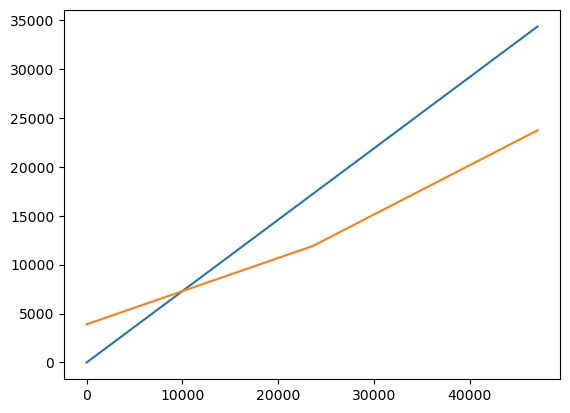

In [4]:
# Формирование расходов на 47 тыс. исков по гражданам
max_lawsuit = 47103
fot = Cost(0, 7411/max_lawsuit, max_lawsuit).cost_of_lawsuit()
arenda = Cost(0, 367/max_lawsuit, max_lawsuit).cost_of_lawsuit()
hoz = Cost(0, 6966/max_lawsuit, max_lawsuit).cost_of_lawsuit()
material = Cost(0, 1183/max_lawsuit, max_lawsuit).cost_of_lawsuit()
manager = Cost(3900, 7800/max_lawsuit, max_lawsuit).cost_of_lawsuit()
cost = graf_cost(0.72907, fot, arenda, hoz, material, manager)

In [5]:
df_citizens_0_region = pd.DataFrame({
    'ФОТ': fot, 'Аренда': arenda, 'Хозяйственные': hoz,
    'Материальные': material, 'Менеджмент': manager,
    'ВСЕГО': cost[1], 'РЫНОЧНЫЕ': cost[0]
    
})

In [6]:
df_citizens_0_region.to_excel('citizens_0_region.xlsx', index=False)

In [7]:
manager = Cost(0, 3900/max_lawsuit, max_lawsuit).cost_of_lawsuit()

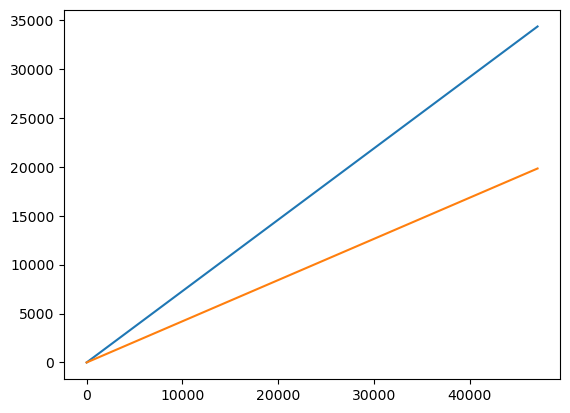

In [8]:
cost = graf_cost(0.72907, fot, arenda, hoz, material, manager)

In [9]:
df_citizens_1_region = pd.DataFrame({
    'ФОТ': fot, 'Аренда': arenda, 'Хозяйственные': hoz,
    'Материальные': material, 'Менеджмент': manager,
    'ВСЕГО': cost[1], 'РЫНОЧНЫЕ': cost[0]
    
})

In [10]:
df_citizens_1_region.to_excel('citizens_1_region.xlsx', index=False)

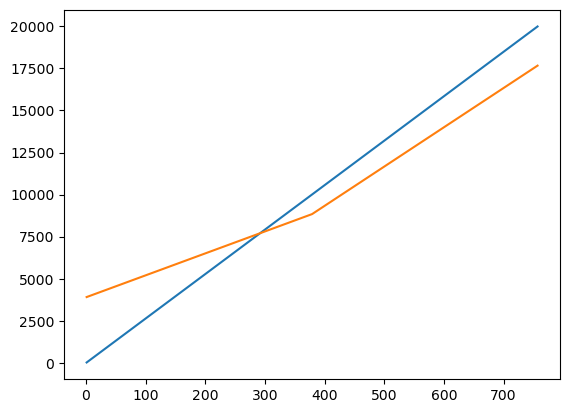

In [11]:
# Формирование расходов на 757 исков по организациям
max_lawsuit = 757
fot = Cost(0, 4941/max_lawsuit, max_lawsuit).cost_of_lawsuit()
arenda = Cost(0, 245/max_lawsuit, max_lawsuit).cost_of_lawsuit()
hoz = Cost(0, 4644/max_lawsuit, max_lawsuit).cost_of_lawsuit()
material = Cost(0, 30/max_lawsuit, max_lawsuit).cost_of_lawsuit()
manager = Cost(3900, 7800/max_lawsuit, max_lawsuit).cost_of_lawsuit()
cost = graf_cost(26.402, fot, arenda, hoz, material, manager)

In [12]:
df_organizations_0_region = pd.DataFrame({
    'ФОТ': fot, 'Аренда': arenda, 'Хозяйственные': hoz,
    'Материальные': material, 'Менеджмент': manager,
    'ВСЕГО': cost[1], 'РЫНОЧНЫЕ': cost[0]
    
})

In [13]:
df_organizations_0_region.to_excel('organizations_0_region.xlsx', index=False)

In [14]:
manager = Cost(0, 3900/max_lawsuit, max_lawsuit).cost_of_lawsuit()

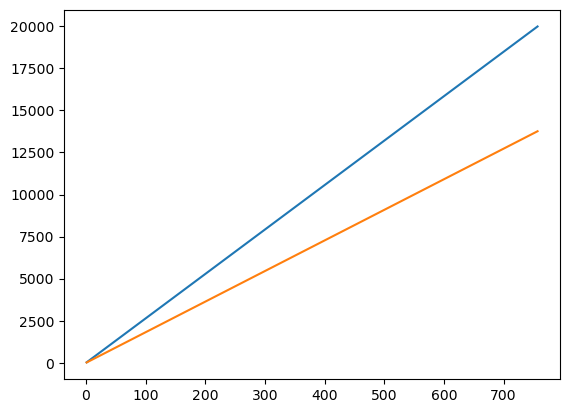

In [15]:
cost = graf_cost(26.402, fot, arenda, hoz, material, manager)

In [16]:
df_organizations_1_region = pd.DataFrame({
    'ФОТ': fot, 'Аренда': arenda, 'Хозяйственные': hoz,
    'Материальные': material, 'Менеджмент': manager,
    'ВСЕГО': cost[1], 'РЫНОЧНЫЕ': cost[0]
    
})

In [17]:
df_organizations_1_region.to_excel('organizations_1_region.xlsx', index=False)

In [18]:
counts_citizens = [5000, 10000, 15000,
                   20000, 25000, 30000,
                   35000, 40000, 45000, 47102]
counts_organizations = [75, 150, 225,
                   300, 375, 450,
                   525, 600, 675, 756]

In [19]:
df_c_0 = df_citizens_0_region.loc[counts_citizens]
df_c_1 = df_citizens_1_region.loc[counts_citizens]
df_o_0 = df_organizations_0_region.loc[counts_organizations]
df_o_1 = df_organizations_1_region.loc[counts_organizations]

In [20]:
def calculation_properties(df):
    df['ВЫГОДА'] = df['РЫНОЧНЫЕ'] - df['ВСЕГО']
    df['ЦЕНА'] = df['ВСЕГО'] / df.index

In [21]:
for elem in [df_c_0, df_c_1, df_o_0, df_o_1]:
    calculation_properties(elem)

In [22]:
with pd.ExcelWriter('Графики.xlsx', mode='a',
                    engine="openpyxl", if_sheet_exists="replace") as writer:
    df_c_0.to_excel(writer, sheet_name='граждане 1 регион')
    df_c_1.to_excel(writer, sheet_name='граждане 2 регион')
    df_o_0.to_excel(writer, sheet_name='организации 1 регион')
    df_o_1.to_excel(writer, sheet_name='организации 2 регион')